#  **Author By**: **Najeeb ullah**

# **Convolution Nerual Network** (CNN)

# **Fashion Mnist** (**dataset**): is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

---

- ## Import Libraries

In [1]:
# import Libraries 

import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers 


TypeError: unhashable type: 'list'

- ## Load The `Fashions MNIST` Dataset From Keras/TensorFlow

In [2]:
# load the fashion MNIST dataset

(X_train, y_train),(X_test, y_test) = keras.datasets.fashion_mnist.load_data()

- ## Display Some Images From The **Dataset**

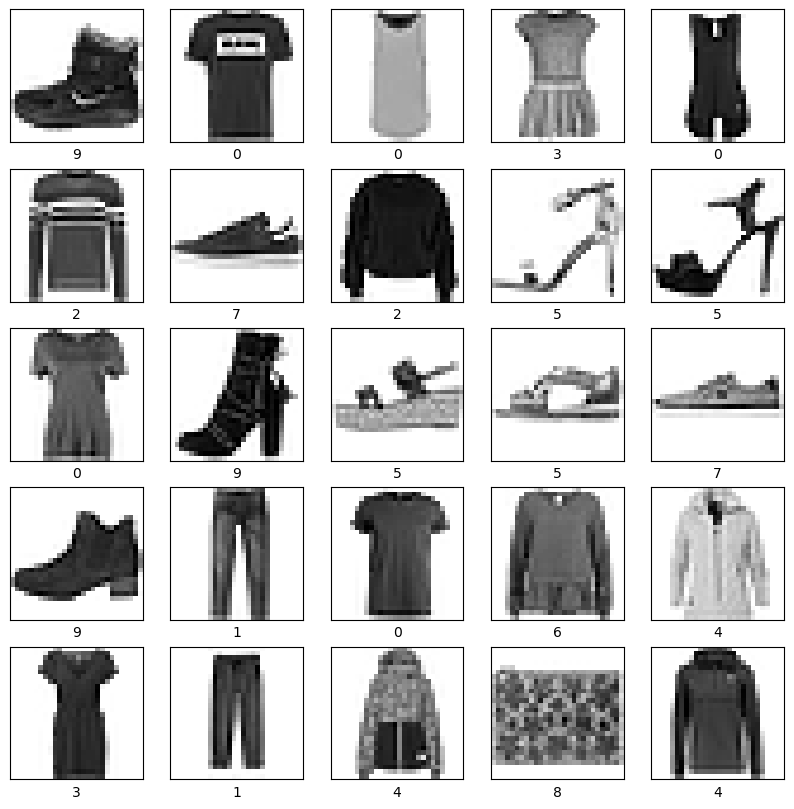

In [3]:
# Display some sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

- # Explore The Dataset


In [4]:
# explore the data
print(f" We have {X_train.shape[0]} images in the training set and {X_test.shape[0]} images in the test set.")
print(f" The images are stored in a 3D numpy array of shape {X_train.shape}")
# print some samples from this array

 We have 60000 images in the training set and 10000 images in the test set.
 The images are stored in a 3D numpy array of shape (60000, 28, 28)


- ##  check the shape of the dataset

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- ## print the image 

In [8]:
6000-1

5999

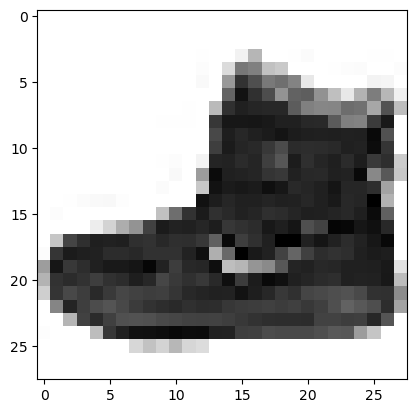

In [9]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

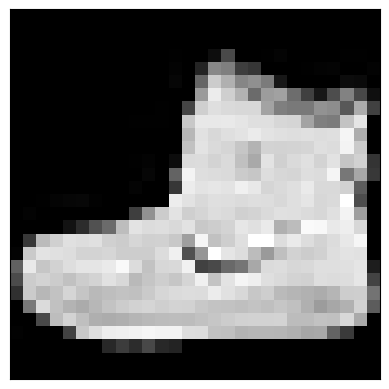

pixel values:
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 13 73  0  0  1  4  0  0  0  0  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  3  0 36136127 62 54  0  0  0  1  3  4  0  0  3
  0  0  0  0  0  0  0  0  0  0  0  0  6  0102204176134144123 23  0  0  0  0 12 10  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0155236207178107156161109 64 23 77130 72 15
  0  0  0  0  0  0  0  0  0  0  0  1  0 69207223218216216163127121122146141 88172 66
  0  0  0  0  0  0  0  0  0  1  1  1  0200232232233229223223215213164127123196229  0
  0  0  0  0  0  0  0  0  0  0  0  0  0183225216223228235227224222224221223245173  0
  0  0  0  0  0  0  0  0  0  0  0  0  0193228218213198180212210211213223220243202  0
  0  0  0  0  0  0  0  0  0  1  3  0 12219220212218

In [10]:
# Diplay the first image in the dataset as data matrix
plt.imshow(X_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image 
print("pixel values:")
for row in X_train[0]:
    for pixel in row:
        print(f"{pixel:3}".format(pixel), end="")
    print()


- ## Also need to change the data type to float32 data normalize.


In [11]:
# also need to change the data type to float32 data normalize
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


In [12]:
# display the values of each pixel in the image after normalization
print("pixel values:")
for row in X_train[0]:
    for pixel in row:
        print(f"{pixel:3.0f}".format(pixel), end="")
    print() 


pixel values:
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  1  1  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  0  0  0  1  1  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1

- ## create a Neural Network Model 

In [ ]:
# create an Input layer 
input_layer = tf.keras.layers.Input(shape=(28,28,1))

#cnn model building 
model = tf.keras.Sequential([

input_layer,
layers.Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
layers.Conv2D(filters=10, kernel_size=(3,3), activation="relu"),


layers.MaxPooling2D(), # pooling layer 

layers.Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
layers.Conv2D(filters=10, kernel_size=(3,3), activation="relu"),

layers.MaxPooling2D(), # pooling layer

layers.Flatten(),
layers.Dense(10, activation="softmax") # output layer 

])
